<img align="center" style="padding-right:10px;" src="Figuras/IP-01-fig_01.png">

# INSTRUÇÃO PRÁTICA - IP-P010
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Revisar e consolidar o conteúdo de __Pandas__ e visualização de dados avançado.

__Exercício 1: Gerando o DataFrame__

* No link do [Faker](https://faker.readthedocs.io/en/master/#) está disponível a documentação deste pacote que permite gerar dados falsos. Para instalação do pacote basta fazer um

In [44]:
#pip install faker
#python -m faker cpf

Desta forma fica disponível o script ``faker`` e o módulo para geração de dados falsos.

Utilizando este módulo, fere um data frame contendo as seguintes colunas

- CPF;
- Nme;
- Idade (entre 18 e 28);
- Sexo;
- Endereço de email;
- Nota no ENEM (entre 640 e 800)
- Abandono (True o False)
- Qual semestre (entre 1 e 8, se Abandono for True)
- CRA após o segundo semestre (float entre 5 e 10)
- CRA após o quarto semestre (float entre 5 e 10)
- CRA após o Sexto semestre (float entre 5 e 10)

In [45]:
from faker import Faker
import random
import pandas as pd
import numpy as np

In [46]:
fake = Faker("pt-BR")

In [47]:
cpf = []
nome = []
idade = []
sexo = []
email = []
notaEnem = []
Abandono = []
SemestreAbandono = []
craSegun = []
craQuar = []
craSex = []

for i in range(1000):
    cpf.append(fake.cpf())
    sexo.append(random.choice(["M", "F"]))
    if sexo[i] == "M":
        nome.append(fake.name_male())
    else:
        nome.append(fake.name_female())
    idade.append(random.randint(18, 28))
    email.append(fake.email())
    notaEnem.append(random.randint(640, 800))
    Abandono.append(random.choice([True, False]))
    if Abandono[i] == True:
        SemestreAbandono.append(random.randint(1, 8))
        if SemestreAbandono[i] > 2:
            craSegun.append(random.uniform(5.0, 10.0))
        else:
            craSegun.append(None)
        if SemestreAbandono[i] > 4:
            craQuar.append(random.uniform(5.0, 10.0))
        else:
            craQuar.append(None)
        if SemestreAbandono[i] > 6:
            craSex.append(random.uniform(5.0, 10.0))
        else:
            craSex.append(None)
    else:
        SemestreAbandono.append(None)
        craSegun.append(random.uniform(5.0, 10.0))
        craQuar.append(random.uniform(5.0, 10.0))
        craSex.append(random.uniform(5.0, 10.0))


        

In [48]:
df = pd.DataFrame({
    "CPF": cpf,
    "Nome": nome,
    "Idade": idade, 
    "Sexo": sexo, 
    "Email": email,
    "Nota do enem": notaEnem, 
    "Abandono": Abandono,
    "Semestre em que abandonou": SemestreAbandono,
    "CRA no segundo semestre": craSegun,
    "CRA no quarto semestre": craQuar,
    "CRA no sexto semestre": craSex,
})
df

,CPF,Nome,Idade,Sexo,Email,Nota do enem,Abandono,Semestre em que abandonou,CRA no segundo semestre,CRA no quarto semestre,CRA no sexto semestre
0,874.962.051-76,Dra. Letícia Mendes,26,F,da-cunhanoah@example.com,667,True,8.0,8.325874,6.205911,8.161439
1,891.573.402-50,Ana Carolina Rodrigues,19,F,felipe49@example.net,685,False,NaN,9.093977,5.068524,5.717890
2,718.405.639-66,Dr. Isaac Carvalho,19,M,sramos@example.net,737,False,NaN,7.925123,8.199969,6.070962
3,572.910.348-41,Carlos Eduardo Araújo,28,M,valentinaviana@example.net,772,False,NaN,5.232204,9.051774,8.465508
4,218.543.069-60,Bruna Santos,27,F,elisacarvalho@example.net,788,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,345.092.718-32,Pedro Miguel da Cunha,24,M,piresana-laura@example.net,655,False,NaN,6.627481,7.087415,5.834466
996,354.012.698-89,Antônio Almeida,23,M,lmartins@example.com,646,True,7.0,8.278582,9.778792,7.163527
997,428.397.510-97,Luiz Gustavo Pereira,26,M,jesusmarcelo@example.org,706,True,6.0,5.035814,6.160976,NaN
998,739.165.420-52,Marina Silveira,26,F,alicefernandes@example.com,724,False,NaN,6.478115,9.520881,6.233137


In [49]:
df.to_csv("/home/girleide-macario-santos/Girleide/Aulas-Python/DadosAluno.csv", index = False)

Carregue os dados gerados pelo seu colega do arquivo ``csv`` e, com os dados do DataFrame

1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.
2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.
3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.
4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.   

In [50]:
alunos = pd.read_csv("/home/girleide-macario-santos/Girleide/Python_Basico/Girleide/P010/listaFakerP010.csv")
alunos

,nome,cpf,email,sexo,idade,nota ENEM,Abandono,semestre do abandono,CRA 2o semestre,CRA 4o semestre,CRA 6o semestre
0,Ana Luiza Pinto,602.491.857-76,ramoshelena@example.net,feminino,19,762.826462,False,NaN,6.060160,6.124695,9.966639
1,Luiz Gustavo Viana,730.541.289-97,qrezende@example.org,masculino,24,689.586908,False,NaN,5.048044,6.948846,5.828311
2,Vicente Ribeiro,108.467.523-44,pereiraelisa@example.net,masculino,24,791.787458,True,7.0,6.078028,5.761775,8.641340
3,Sofia Rodrigues,506.839.471-84,beniciogoncalves@example.net,feminino,25,732.938790,True,7.0,8.806693,8.563480,8.425148
4,Dra. Eduarda da Cruz,267.814.950-11,isis08@example.org,feminino,28,686.515480,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,Vitor Gabriel Lima,472.615.390-07,yda-rocha@example.org,masculino,22,729.710302,True,5.0,9.757581,8.659783,NaN
996,Srta. Pietra das Neves,146.938.725-55,aragaomaite@example.net,feminino,22,740.058054,True,4.0,6.810707,NaN,NaN
997,Gustavo Nunes,517.842.960-58,daniela19@example.net,masculino,26,709.377425,True,1.0,NaN,NaN,NaN
998,Maria Luiza Ferreira,641.793.852-28,marianecostela@example.org,feminino,22,669.961395,True,1.0,NaN,NaN,NaN



1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.

In [51]:
alunos["sexo"].value_counts()

sexo
masculino    502
feminino     498
Name: count, dtype: int64

2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.

In [52]:
alunos.groupby("idade")["nota ENEM"].agg(["mean"])

,mean
idade,
18,727.043890
19,721.779121
20,714.093878
21,715.475546
22,713.422540
23,718.125442
24,726.136252
25,724.758848
26,716.225498


3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.

In [53]:
alunos["nota ENEM"] = ((alunos["nota ENEM"]-640)/(800-640))*5+5

4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.

In [54]:
alunosCRA = alunos.nlargest(10, "CRA 6o semestre")
alunosCRA

,nome,cpf,email,sexo,idade,nota ENEM,Abandono,semestre do abandono,CRA 2o semestre,CRA 4o semestre,CRA 6o semestre
444,Otávio Cardoso,608.235.147-90,novaesbenjamin@example.net,masculino,24,5.713328,False,NaN,6.672111,6.674470,9.997074
907,Stephany Alves,071.842.396-87,zda-luz@example.com,feminino,25,6.401690,False,NaN,8.853808,6.532908,9.986147
417,Ian Rodrigues,261.853.094-24,qviana@example.com,masculino,26,6.478947,False,NaN,5.728113,8.143975,9.983280
125,Antônio Almeida,287.041.953-88,julia28@example.org,masculino,24,9.612801,False,NaN,6.328303,9.601562,9.980081
0,Ana Luiza Pinto,602.491.857-76,ramoshelena@example.net,feminino,19,8.838327,False,NaN,6.060160,6.124695,9.966639
371,Catarina Barros,520.781.493-14,stephanyda-mata@example.net,feminino,27,7.253587,True,6.0,8.209879,5.530995,9.966410
88,Sarah Farias,103.275.469-99,caroline24@example.org,feminino,23,5.390572,False,NaN,6.682898,6.185213,9.964521
955,Sr. Diogo Barros,420.318.967-50,silveiraemanuel@example.com,masculino,21,5.285399,False,NaN,5.901652,9.831645,9.963474
278,Raul Viana,940.657.312-16,umelo@example.org,masculino,28,8.559961,False,NaN,9.430934,5.059103,9.960327
279,Renan Correia,892.637.145-09,pintoemilly@example.net,masculino,26,7.335175,False,NaN,9.333362,5.016577,9.960010


In [55]:
import matplotlib.pyplot as plt

In [56]:
alunosCRA['sexo'].value_counts

<bound method IndexOpsMixin.value_counts of 444    masculino
907     feminino
417    masculino
125    masculino
0       feminino
371     feminino
88      feminino
955    masculino
278    masculino
279    masculino
Name: sexo, dtype: object>

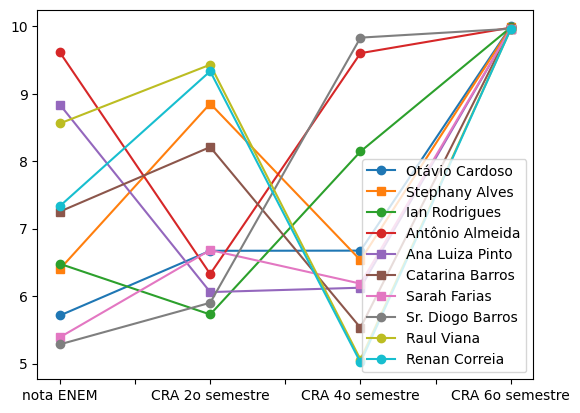

In [79]:
for i in alunosCRA.index:
    alunosCRA.loc[i,['nota ENEM',
                'CRA 2o semestre', 
                'CRA 4o semestre', 
                'CRA 6o semestre']].plot(marker='o' if alunosCRA.loc[i]["sexo"] == 'masculino' else 's')
plt.legend(alunosCRA["nome"])
